* ### WeRateDogs Data Analysis Project

* [Importing Libraries](#chapter0)
* [Data Gathering ](#chapter1)
    * [API credentials](#section_1_1)
    * [All Data Frames](#section_1_2)
* [Data Assessment ](#chapter2)
    * [Visual Assessment](#section_2_1)
    * [Programmatic Assessment](#section_2_2)
* [Data Issues](#chapter3)
    * [Tidiness Issues](#section_3_1)
    * [Quality Issues](#section_3_2)
* [Data Cleaning](#chapter4) 
    * [Cleaning Archive DF](#section_4_1)
    * [Cleaning image DF](#section_4_2)
* [Storing Data](#chapter5)
* [Insight 1](#chapter6) 
* [Insight 2](#chapter7)
* [Insight 3](#chapter8)
* [Insight 4](#chapter9)

In [563]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
from PIL import Image
from io import BytesIO
import glob
pd.set_option('display.max_colwidth', None)

### Data Gathering  <a class="anchor" id="chapter1"></a>

* In this part we have 3 data sets that we need to convert to Pd.DataFrames they are as follows: A) Twitter_archive.CSV B) Image Predictions File.tsv C) Additional Data via the Twitter API (json file)

In [564]:
# Loading the downloaded .csv file to pd DateFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [565]:
# extracting the .tsv file from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [566]:
# Loading the downloaded .tsv file to pd DateFrame
df_image = pd.read_csv('image-predictions.tsv', sep="\t")

* While searching for tweepy info i have found this idea of keeping secret keys, for other programmers to have the ability to have the most updated data via used API.

In [464]:
lost_tweets = []

def search_for_tweets_id(consumer_key, consumer_secret, access_token, access_secret):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)
    
    with open('tweet_json.txt', 'w') as file:
        for tweet_id in list(df_archive['tweet_id']):
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode ='extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                lost_tweets.append(tweet_id)

# This is not an error, jusr re run the above and below cells with your twitter credentials.

In [465]:
consumer_key = input('Consumer Key\n')
consumer_secret = input('Consumer Secret\n')
access_token = input('Access Token\n')
access_secret = input('Access Secret\n')
if __name__ == '__main__':
    search_for_tweets_id(consumer_key, consumer_secret, access_token, access_secret)

Consumer Key

Consumer Secret

Access Token

Access Secret



In [567]:
df_api = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_api.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'followers_count': user_count})

In [568]:
twitter_api = pd.DataFrame(df_api)

In [569]:
twitter_api

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7485,35455,8880908
1,892177421306343426,5554,30665,8880908
2,891815181378084864,3678,23066,8880908
3,891689557279858688,7662,38739,8880908
4,891327558926688256,8263,36993,8880908
...,...,...,...,...
2326,666049248165822465,40,96,8880947
2327,666044226329800704,125,264,8880947
2328,666033412701032449,39,109,8880947
2329,666029285002620928,41,119,8880947


#### All Data Frames <a class="anchor" id="section_1_2"></a>

In [570]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favorite_count   2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [571]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [572]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Data Assessment <a class="anchor" id="chapter2"></a>

#### Visual Assessment <a class="anchor" id="section_2_1"></a>

* Some visual assessment was done using google spreadsheets (refer to Screenshots)

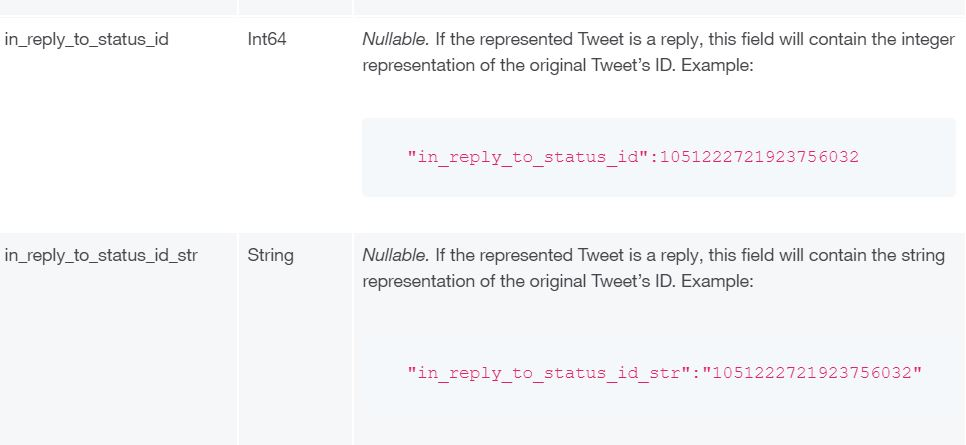

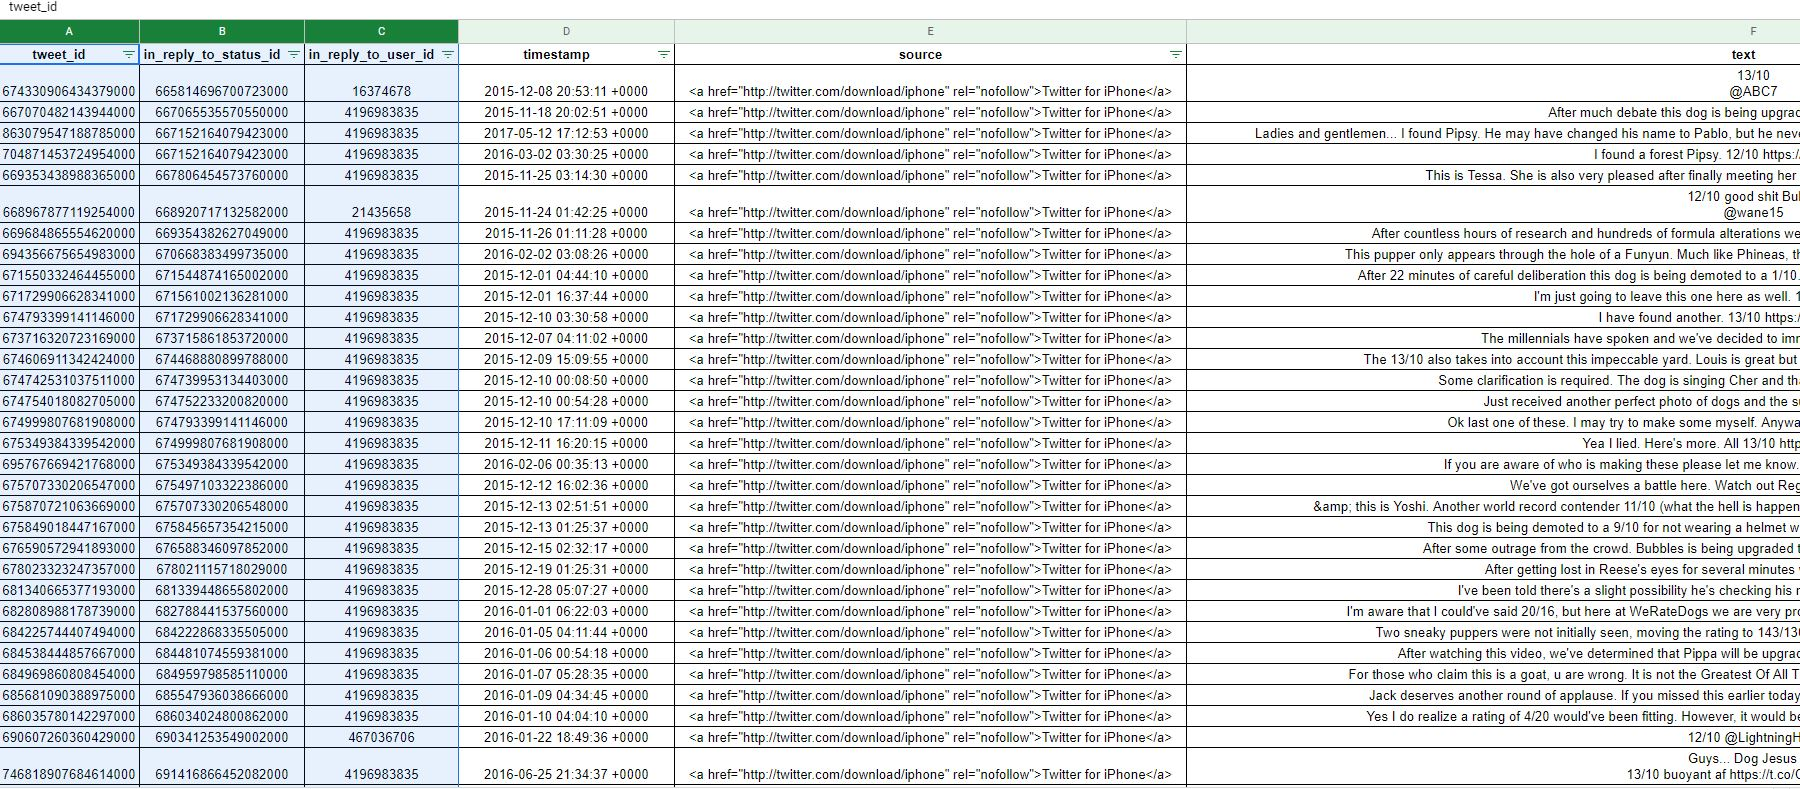

In [573]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [574]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [575]:
twitter_api

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7485,35455,8880908
1,892177421306343426,5554,30665,8880908
2,891815181378084864,3678,23066,8880908
3,891689557279858688,7662,38739,8880908
4,891327558926688256,8263,36993,8880908
...,...,...,...,...
2326,666049248165822465,40,96,8880947
2327,666044226329800704,125,264,8880947
2328,666033412701032449,39,109,8880947
2329,666029285002620928,41,119,8880947


#### Programmatic Assessment <a class="anchor" id="section_2_2"></a>

In [576]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [577]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [578]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favorite_count   2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [579]:
df_archive[df_archive['doggo'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [580]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Obi          1
Noah         1
Pubert       1
Aja          1
Tayzie       1
Name: name, Length: 957, dtype: int64

In [581]:
df_archive['text'].sort_values()

1371                                              "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU" 11/10 https://t.co/rSNCEiTtfI
1918                                                                     "AT DAWN, WE RIDE"\n10/10 for both dogs https://t.co/3aXX6wH6it
2321    "Can you behave? You're ruining my wedding day"\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU
1130                                                                                 "Challenge accepted"\n10/10 https://t.co/vNjvr5Bl9u
1127                                                                "Challenge completed" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB
                                                                      ...                                                               
1870                                                                                             holy shit 12/10 https://t.co/p6O8X93bTQ
572                                      

In [582]:
twitter_api[twitter_api['favorite_count'].isnull()]

,tweet_id,retweet_count,favorite_count,followers_count


In [583]:
twitter_api.retweet_count.sort_values()

279         1
328         2
1271        2
262         2
109         3
        ...  
65      39676
397     42581
517     55118
1055    56274
1015    75627
Name: retweet_count, Length: 2331, dtype: int64

In [584]:
sum(df_archive['tweet_id'].duplicated())

0

In [585]:
sum(df_image['tweet_id'].duplicated())

0

In [586]:
sum(twitter_api['tweet_id'].duplicated())

0

In [587]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [588]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [589]:
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
four-poster             1
clog                    1
hummingbird             1
fountain                1
African_grey            1
Name: p1, Length: 378, dtype: int64

In [590]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [591]:
twitter_api.favorite_count.value_counts()

0        163
1839       4
1353       4
2476       4
409        4
        ... 
8801       1
19042      1
613        1
3096       1
10228      1
Name: favorite_count, Length: 1983, dtype: int64

In [592]:
twitter_api.retweet_count.value_counts()

218     6
1009    5
790     5
435     5
41      5
       ..
231     1
4122    1
239     1
241     1
1862    1
Name: retweet_count, Length: 1667, dtype: int64

### Data Issues <a class="anchor" id="chapter3"></a>

#### Tidiness Issues <a class="anchor" id="section_3_1"></a>

df_archive:
* There are 4 columns (doggo,floofer, pupper, puppo) which are dog stages in DoggoLingo and the info provided in the project motivation, means there is one variable stored in 4 columns.
* Some columns doesn't represent any values ('expanded_urls', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'), and might not be needed for analysis.
* NONE word needs to be replaced to allow us to know the null values.
* timestamp has more than one variable (Date, and Time).

df_image:
* (p1, p1_conf, p1_dog) Don't represent variable names.

twitter_api:
* No Tidiness Issues Found.

* The three data sets has columns that needs to be removed, Not useful to analyze or capture insights.
* The three data sets are same observation unit displayed in 3 tables.

#### Quality Issues <a class="anchor" id="section_3_2"></a>

df_archive:
* Columns with missing values [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls] (Completeness Issue).
* Based on the requirement it has to be original tweet neither retweets nor reply, tweets that has value in_reply_to_status_id, needs to be removed and keep original tweets only (Validity Issue).
* •	rating_numerator column has 7 extreme values, extremly rated values of (165,144,121,204,420,1776,99).(validity & accuracy).
* "These ratings almost always have a denominator of 10".said in the (Project Overview), however we have values in rating_denominator columns less and more than 10.
* 'rating_denumirator' has zero values.
* 'Name' column has too many NONE values, might cause issues analyzing.
* timestamp needs to be converted to PD.datetime values.

df_image:
* 66 Duplicate values in column jpg_url, and more than 2000 duplicated (img_num).
* P1 column has prediction of no dogs names.
* Columns from p2 until p3_dog have low condidence levels, needs to be removed.
* we have in P1_dog 543 values for no dogs (False).

twitter_api:
* API dataset has 163 values favorite_count == zero, means never been favorited

### Data Cleaning <a class="anchor" id="chapter4"></a>

#### Cleaning Archive DF <a class="anchor" id="section_4_1"></a>

In [593]:
# create a cleaned archive
archive_clean = df_archive.copy()

In [594]:
image_clean = df_image.copy()

In [595]:
# create a cleaned API
api_clean = twitter_api.copy()

In [596]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [597]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [598]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favorite_count   2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [599]:
# Define: first we need to keep the origial tweets only, remove all rows that has values (in_reply_to_status_id)
# Code: 
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]

In [600]:
# Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [601]:
# Define: Remove Columns with Missing values, and excluded from the analysis
# Code:
archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "source", "expanded_urls"], axis=1, inplace = True)

In [602]:
# test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   text                2278 non-null   object
 3   rating_numerator    2278 non-null   int64 
 4   rating_denominator  2278 non-null   int64 
 5   name                2278 non-null   object
 6   doggo               2278 non-null   object
 7   floofer             2278 non-null   object
 8   pupper              2278 non-null   object
 9   puppo               2278 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.8+ KB


In [603]:
archive_clean.rating_numerator.value_counts()

12      544
10      455
11      451
13      331
9       155
8       102
7        53
14       49
5        35
6        32
3        19
4        16
2         9
1         6
75        2
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
15        1
27        1
45        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [604]:
# Define: Remove all the extreme values in column (rating_numerator), (165,144,121,204,420,1776,99)---- refer to (https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value)
# Code:
archive_clean = archive_clean[archive_clean.rating_numerator <= 88]

In [605]:
archive_clean.rating_numerator.value_counts()

12    544
10    455
11    451
13    331
9     155
8     102
7      53
14     49
5      35
6      32
3      19
4      16
2       9
1       6
75      2
26      1
24      1
80      1
44      1
50      1
60      1
45      1
84      1
88      1
15      1
27      1
0       1
Name: rating_numerator, dtype: int64

In [606]:
# Test
archive_clean.rating_denominator.value_counts()

10    2258
11       3
50       3
80       2
7        1
70       1
40       1
20       1
2        1
Name: rating_denominator, dtype: int64

In [607]:
# Define: Cleaning the column rating_denumirator from all values != 10
# Code:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

In [608]:
# Test
archive_clean.rating_denominator.value_counts()

10    2258
Name: rating_denominator, dtype: int64

In [609]:
# Define: Convert Time stamp to PD.Date time, and seperate date from time to know tweets beyond August 1st, 2017 (refer to https://www.geeksforgeeks.org/python-pandas-to_datetime/)
# Code:
archive_clean["timestamp"]= pd.to_datetime(archive_clean["timestamp"]) 

In [610]:
#test:
archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
653,792050063153438720,2016-10-28 17:07:05+00:00,This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. Still a very good dog. 11/10 https://t.co/S3f1SYylzu,11,10,Remus,None,None,None,None
1853,675706639471788032,2015-12-12 15:59:51+00:00,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,10,10,a,None,None,None,None
466,817171292965273600,2017-01-06 00:49:53+00:00,This is Tebow. He kindly requests that you put down the coffee and play with him. 13/10 such a good boy https://t.co/56uBP28eqw,13,10,Tebow,None,None,None,None
888,759846353224826880,2016-07-31 20:21:02+00:00,This is Kirby. He's a Beneblip Cumberpat. Pretty heckin rare. 11/10 would put my face against his face https://t.co/fd6uucghY6,11,10,Kirby,None,None,None,None
1848,675798442703122432,2015-12-12 22:04:39+00:00,This is Bernie. He just touched a boob for the first time. 10/10 https://t.co/whQKMygnK6,10,10,Bernie,None,None,None,None
156,861383897657036800,2017-05-08 00:54:59+00:00,This is Hobbes. He's never seen bubbles before. 13/10 deep breaths buddy https://t.co/QFRlbZw4Z1,13,10,Hobbes,None,None,None,None
366,828801551087042563,2017-02-07 03:04:22+00:00,"RT @dog_rates: This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https…",12,10,Gus,None,None,None,None
774,776218204058357768,2016-09-15 00:36:55+00:00,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,13,10,None,None,floofer,None,None
549,805207613751304193,2016-12-04 00:30:29+00:00,This is Shooter. He's doing quite the snowy zoom. 12/10 https://t.co/lHy4Xbyhd9,12,10,Shooter,None,None,None,None
57,881268444196462592,2017-07-01 21:49:04+00:00,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,12,10,Elliot,None,None,None,None


In [611]:
# Define: Split Columns to Date Column, and Time column
# Code:
archive_clean['Dates'] = pd.to_datetime(archive_clean['timestamp']).dt.date
archive_clean['Time'] = pd.to_datetime(archive_clean['timestamp']).dt.time

In [612]:
# Test
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,None,None,None,None,2015-11-16,00:24:50
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,a,None,None,None,None,2015-11-16,00:04:52
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,None,None,None,None,2015-11-15,23:21:54
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,None,None,None,None,2015-11-15,23:05:30


In [613]:
# Remove timestamp column
#Code:
archive_clean = archive_clean.drop(["timestamp"], axis=1, errors='ignore')

In [614]:
# Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2258 non-null   int64 
 1   text                2258 non-null   object
 2   rating_numerator    2258 non-null   int64 
 3   rating_denominator  2258 non-null   int64 
 4   name                2258 non-null   object
 5   doggo               2258 non-null   object
 6   floofer             2258 non-null   object
 7   pupper              2258 non-null   object
 8   puppo               2258 non-null   object
 9   Dates               2258 non-null   object
 10  Time                2258 non-null   object
dtypes: int64(3), object(8)
memory usage: 211.7+ KB


In [615]:
# melting 4 columns (doggo,floofer, pupper, puppo) in one called dog_class
# Code:
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [616]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2258 non-null   int64 
 1   text                2258 non-null   object
 2   rating_numerator    2258 non-null   int64 
 3   rating_denominator  2258 non-null   int64 
 4   name                2258 non-null   object
 5   doggo               2258 non-null   object
 6   floofer             2258 non-null   object
 7   pupper              2258 non-null   object
 8   puppo               2258 non-null   object
 9   Dates               2258 non-null   object
 10  Time                2258 non-null   object
 11  dog_stage           2258 non-null   object
dtypes: int64(3), object(9)
memory usage: 229.3+ KB


In [617]:
archive_clean.dog_stage.value_counts()

NoneNoneNoneNone        1886
NoneNonepupperNone       242
doggoNoneNoneNone         80
NoneNoneNonepuppo         28
doggoNonepupperNone       11
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [618]:
archive_clean.loc[archive_clean.dog_stage == 'NoneNoneNoneNone', 'dog_stage'] = 'not_specified'

In [619]:
archive_clean.loc[archive_clean.dog_stage == 'NoneNonepupperNone', 'dog_stage'] = 'pupper'

In [620]:
archive_clean.loc[archive_clean.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'

In [621]:
archive_clean.loc[archive_clean.dog_stage == 'NoneNoneNonepuppo', 'dog_stage'] = 'puppo'

In [622]:
archive_clean.loc[archive_clean.dog_stage == 'doggoNonepupperNone', 'dog_stage'] = 'doggo-pupper'

In [623]:
archive_clean.loc[archive_clean.dog_stage == 'NoneflooferNoneNone', 'dog_stage'] = 'floofer'

In [624]:
archive_clean.loc[archive_clean.dog_stage == 'doggosNoneNoneNone', 'dog_stage'] = 'doggo'

In [625]:
archive_clean.loc[archive_clean.dog_stage == 'doggoflooferNoneNone', 'dog_stage'] = 'doggo-floofer'

In [626]:
archive_clean.loc[archive_clean.dog_stage == 'doggoNoneNonepuppo', 'dog_stage'] = 'doggo-puppo'

In [627]:
# Test 
archive_clean.dog_stage.value_counts()

not_specified    1886
pupper            242
doggo              80
puppo              28
doggo-pupper       11
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [628]:
#Test
archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56,not_specified
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,2017-08-01,00:17:27,not_specified
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,2017-07-31,00:18:03,not_specified
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,2017-07-30,15:58:51,not_specified
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,2017-07-29,16:00:24,not_specified


In [629]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2258 non-null   int64 
 1   text                2258 non-null   object
 2   rating_numerator    2258 non-null   int64 
 3   rating_denominator  2258 non-null   int64 
 4   name                2258 non-null   object
 5   doggo               2258 non-null   object
 6   floofer             2258 non-null   object
 7   pupper              2258 non-null   object
 8   puppo               2258 non-null   object
 9   Dates               2258 non-null   object
 10  Time                2258 non-null   object
 11  dog_stage           2258 non-null   object
dtypes: int64(3), object(9)
memory usage: 229.3+ KB


In [630]:
archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time,dog_stage
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,14,10,Emmy,None,None,None,None,2017-06-26,00:13:58,not_specified
1107,734776360183431168,This is Livvie. Someone should tell her it's been 47 years since Woodstock. Magical eyes tho 11/10 would stare into https://t.co/qw07vhVHuO,11,10,Livvie,None,None,None,None,2016-05-23,16:01:50,not_specified
258,843604394117681152,This is Hank. He's been outside for 3 minutes and already made a friend. Way to go Hank. 11/10 for both https://t.co/wHUElL84RC,11,10,Hank,None,None,None,None,2017-03-19,23:25:35,not_specified
265,842115215311396866,This is Bentley. It's his first time going to the beach. I think he's a fan. 12/10 would build sand castles with https://t.co/iDK4OyQJoy,12,10,Bentley,None,None,None,None,2017-03-15,20:48:07,not_specified
2345,666063827256086533,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,10,10,the,None,None,None,None,2015-11-16,01:22:45,not_specified


#### Cleaning image DF <a class="anchor" id="section_4_2"></a># Cleaning image DF

In [631]:
image_clean = df_image.copy()

In [632]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [633]:
# Change the column names (p1, p1_conf, p1_dog) to more descriptive names
# Code
image_clean.rename(columns = {"p1": "class_prediction", 
                                  "p1_conf":"prediction_confidence", 
                                  "p1_dog": "breed"}, inplace = True)

In [634]:
#Test
image_clean.head()

,tweet_id,jpg_url,img_num,class_prediction,prediction_confidence,breed,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [635]:
# Remove columns from p2 until p3_dog due to low condidence levels 1%.
#Code
image_clean.drop(["p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis=1, errors='ignore', inplace = True)

In [636]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   jpg_url                2075 non-null   object 
 2   img_num                2075 non-null   int64  
 3   class_prediction       2075 non-null   object 
 4   prediction_confidence  2075 non-null   float64
 5   breed                  2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


In [637]:
# Remove all values != dog in breed Column
#Code
image_clean = image_clean[image_clean.breed == True]

In [638]:
# Test
image_clean.sample(20)

,tweet_id,jpg_url,img_num,class_prediction,prediction_confidence,breed
328,672068090318987265,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1,pug,0.863385,True
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True
1450,776218204058357768,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,Samoyed,0.940326,True
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True


In [639]:
image_clean.class_prediction.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
Japanese_spaniel        1
clumber                 1
Scotch_terrier          1
silky_terrier           1
standard_schnauzer      1
Name: class_prediction, Length: 111, dtype: int64

In [640]:
sum(image_clean.class_prediction.isnull())

0

In [641]:
sum(image_clean.jpg_url.isnull())

0

# Cleaning twitter_api 

* For favorite_count == Zero, will be kept until the analysis phase

In [642]:
api_clean = twitter_api.copy()

In [643]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favorite_count   2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [644]:
api_clean.favorite_count.value_counts()

0        163
1839       4
1353       4
2476       4
409        4
        ... 
8801       1
19042      1
613        1
3096       1
10228      1
Name: favorite_count, Length: 1983, dtype: int64

In [645]:
api_clean.retweet_count.sort_values()

279         1
328         2
1271        2
262         2
109         3
        ...  
65      39676
397     42581
517     55118
1055    56274
1015    75627
Name: retweet_count, Length: 2331, dtype: int64

### Storing Data <a class="anchor" id="chapter5"></a>

In [700]:
# Storing data sets, First Store Twitter archive and image prediction, and remove tweets with no images
#Code
twitter_df = pd.merge(archive_clean, image_clean, how = 'left', on = ['tweet_id'])

In [701]:
# to keep only with images
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

In [702]:
# test
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 1 to 2257
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1504 non-null   int64  
 1   text                   1504 non-null   object 
 2   rating_numerator       1504 non-null   int64  
 3   rating_denominator     1504 non-null   int64  
 4   name                   1504 non-null   object 
 5   doggo                  1504 non-null   object 
 6   floofer                1504 non-null   object 
 7   pupper                 1504 non-null   object 
 8   puppo                  1504 non-null   object 
 9   Dates                  1504 non-null   object 
 10  Time                   1504 non-null   object 
 11  dog_stage              1504 non-null   object 
 12  jpg_url                1504 non-null   object 
 13  img_num                1504 non-null   float64
 14  class_prediction       1504 non-null   object 
 15  pred

In [703]:
# Storing all data sets together in one dataframe
# Code:
master_twitter_df = pd.merge(twitter_df, api_clean, how = 'left', on = ['tweet_id'])

In [704]:
# Test
master_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 0 to 1503
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1504 non-null   int64  
 1   text                   1504 non-null   object 
 2   rating_numerator       1504 non-null   int64  
 3   rating_denominator     1504 non-null   int64  
 4   name                   1504 non-null   object 
 5   doggo                  1504 non-null   object 
 6   floofer                1504 non-null   object 
 7   pupper                 1504 non-null   object 
 8   puppo                  1504 non-null   object 
 9   Dates                  1504 non-null   object 
 10  Time                   1504 non-null   object 
 11  dog_stage              1504 non-null   object 
 12  jpg_url                1504 non-null   object 
 13  img_num                1504 non-null   float64
 14  class_prediction       1504 non-null   object 
 15  pred

In [705]:
#another missing values to remove (favorite_count)
# Code
master_twitter_df = master_twitter_df[master_twitter_df['favorite_count'].notnull()]

In [706]:
master_twitter_df.drop(["name", "Time", "pupper", "puppo", "doggo", "floofer", ], axis=1, inplace = True)

In [707]:
master_twitter_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [708]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [709]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1492 non-null   int64  
 1   text                   1492 non-null   object 
 2   rating_numerator       1492 non-null   int64  
 3   rating_denominator     1492 non-null   int64  
 4   Dates                  1492 non-null   object 
 5   dog_stage              1492 non-null   object 
 6   jpg_url                1492 non-null   object 
 7   img_num                1492 non-null   float64
 8   class_prediction       1492 non-null   object 
 9   prediction_confidence  1492 non-null   float64
 10  breed                  1492 non-null   bool   
 11  retweet_count          1492 non-null   float64
 12  favorite_count         1492 non-null   float64
 13  followers_count        1492 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage

In [710]:
master_df[master_df.text.str.contains(r"\d+\.\d*\/\d+")][['text', 'rating_numerator']]

,text,rating_numerator
36,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
434,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
478,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1091,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [711]:
# extracting the rates from the text
master_df['rating_numerator'] = master_df.text.str.extract('(\d[.,]?\d+)')

In [712]:
master_df['rating_numerator'].unique()

array(['13', '12', '14', '11', '2195', '10', '60', '98', '9.75', '46',
       '100', '17', '2002', '47', '400', '31', '80', '97', '61', '260',
       '2015', '92', '85', '1949'], dtype=object)

In [713]:
master_df['rating_numerator'].unique()

array(['13', '12', '14', '11', '2195', '10', '60', '98', '9.75', '46',
       '100', '17', '2002', '47', '400', '31', '80', '97', '61', '260',
       '2015', '92', '85', '1949'], dtype=object)

In [714]:
# another values shown up, finding the tweet id's for the above extreme values
master_df[(master_df['rating_numerator'] == '2195')  | 
          (master_df['rating_numerator'] == '60')  |  
          (master_df['rating_numerator'] == '98')  |
          (master_df['rating_numerator'] == '46')  | 
          (master_df['rating_numerator'] == '100')  |
          (master_df['rating_numerator'] == '2002')  |
          (master_df['rating_numerator'] == '47')  |
          (master_df['rating_numerator'] == '400')  | 
          (master_df['rating_numerator'] == '31')  |  
          (master_df['rating_numerator'] == '80')  | 
          (master_df['rating_numerator'] == '97')  |
          (master_df['rating_numerator'] == '61')  | 
          (master_df['rating_numerator'] == '260')  | 
          (master_df['rating_numerator'] == '2015')  | 
          (master_df['rating_numerator'] == '92')  |
          (master_df['rating_numerator'] == '85')  |
          (master_df['rating_numerator'] == '1949')]

,tweet_id,text,rating_numerator,rating_denominator,Dates,dog_stage,jpg_url,img_num,class_prediction,prediction_confidence,breed,retweet_count,favorite_count,followers_count
58,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,2195,10,2017-06-21,pupper,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1.0,Irish_setter,0.364729,True,71.0,0.0,8880908.0
164,843235543001513987,This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,60,10,2017-03-18,not_specified,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1.0,Pembroke,0.958452,True,5803.0,20975.0,8880908.0
387,796080075804475393,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,98,10,2016-11-08,not_specified,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1.0,chow,0.973846,True,2297.0,8450.0,8880912.0
458,781251288990355457,This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4,46,10,2016-09-28,not_specified,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,2.0,Mexican_hairless,0.887771,True,2063.0,8380.0,8880913.0
530,766793450729734144,This is Rufus. He just missed out on the 100m final at Rio. Already training hard for Tokyo. 10/10 never give pup https://t.co/exrRjjJqeO,100,10,2016-08-20,not_specified,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1.0,beagle,0.451697,True,1338.0,4986.0,8880914.0
613,750086836815486976,This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd,2002,10,2016-07-04,not_specified,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1.0,pug,0.978277,True,521.0,2129.0,8880928.0
700,734776360183431168,This is Livvie. Someone should tell her it's been 47 years since Woodstock. Magical eyes tho 11/10 would stare into https://t.co/qw07vhVHuO,47,10,2016-05-23,not_specified,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1.0,Siberian_husky,0.304902,True,518.0,2434.0,8880930.0
817,708469915515297792,This is Bobble. He's a Croatian Galifianakis. Hears everything within 400 miles. 11/10 would snug diligently https://t.co/VwDc6PTDzk,400,10,2016-03-12,not_specified,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1.0,Chihuahua,0.748163,True,790.0,3023.0,8880930.0
925,696405997980676096,This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ,31,10,2016-02-07,not_specified,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1.0,borzoi,0.132845,True,1125.0,3117.0,8880931.0
956,692530551048294401,Say hello to Cody. He's been to like 80 countries and is way more cultured than you. He wanted me to say that. 10/10 https://t.co/Iv3flDTpXu,80,10,2016-01-28,not_specified,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1.0,Siberian_husky,0.486428,True,400.0,1787.0,8880930.0


# The above tweet id's and related texts were accessed manually to capture the correct user ratings and will be replaced programmatically next

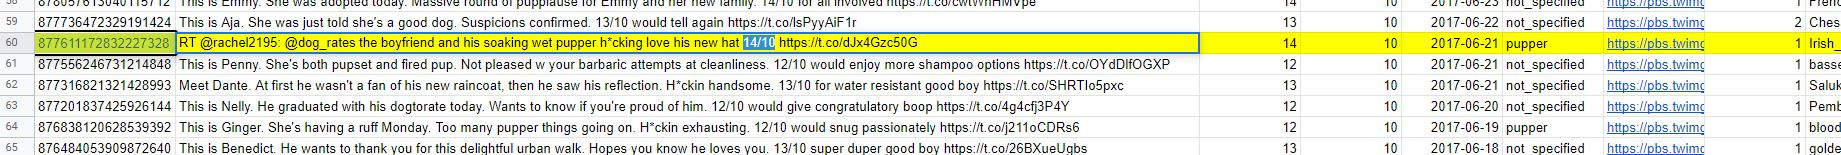

In [715]:
# Replacing the extreme values by the correct ones collected manually using spreadsheets, and in the code above that shows
# all tweets with wrong rates
master_df.loc[master_df.rating_numerator == '2195', 'rating_numerator'] = '14'
master_df.loc[master_df.rating_numerator == '60', 'rating_numerator'] = '13'
master_df.loc[master_df.rating_numerator == '98', 'rating_numerator'] = '12'
master_df.loc[master_df.rating_numerator == '46', 'rating_numerator'] = '11'
master_df.loc[master_df.rating_numerator == '100', 'rating_numerator'] = '10'
master_df.loc[master_df.rating_numerator == '2002', 'rating_numerator'] = '12'
master_df.loc[master_df.rating_numerator == '47', 'rating_numerator'] = '11'
master_df.loc[master_df.rating_numerator == '400', 'rating_numerator'] = '11'
master_df.loc[master_df.rating_numerator == '31', 'rating_numerator'] = '7'
master_df.loc[master_df.rating_numerator == '80', 'rating_numerator'] = '10'
master_df.loc[master_df.rating_numerator == '97', 'rating_numerator'] = '11'
master_df.loc[master_df.rating_numerator == '61', 'rating_numerator'] = '7'
master_df.loc[master_df.rating_numerator == '260', 'rating_numerator'] = '9'
master_df.loc[master_df.rating_numerator == '2015', 'rating_numerator'] = '10'
master_df.loc[master_df.rating_numerator == '2015', 'rating_numerator'] = '11'
master_df.loc[master_df.rating_numerator == '92', 'rating_numerator'] = '11'
master_df.loc[master_df.rating_numerator == '60', 'rating_numerator'] = '9'
master_df.loc[master_df.rating_numerator == '85', 'rating_numerator'] = '8'
master_df.loc[master_df.rating_numerator == '100', 'rating_numerator'] = '12'
master_df.loc[master_df.rating_numerator == '1949', 'rating_numerator'] = '5'

In [716]:
master_df.rating_numerator.unique()

array(['13', '12', '14', '11', '10', '9.75', '17', '7', '9', '8', '5'],
      dtype=object)

In [717]:
# Test
master_df

,tweet_id,text,rating_numerator,rating_denominator,Dates,dog_stage,jpg_url,img_num,class_prediction,prediction_confidence,breed,retweet_count,favorite_count,followers_count
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,2017-08-01,not_specified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,5554.0,30665.0,8880908.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,2017-07-31,not_specified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,3678.0,23066.0,8880908.0
2,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,2017-07-29,not_specified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,8263.0,36993.0,8880908.0
3,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,2017-07-29,not_specified,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,2767.0,18649.0,8880908.0
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,2017-07-28,not_specified,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,1796.0,10836.0,8880908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,2015-11-16,not_specified,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,40.0,96.0,8880947.0
1488,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,10,10,2015-11-16,not_specified,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,125.0,264.0,8880947.0
1489,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,10,10,2015-11-15,not_specified,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,39.0,109.0,8880947.0
1490,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,10,10,2015-11-15,not_specified,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,41.0,119.0,8880947.0


In [718]:
master_df['class_prediction'].value_counts()

golden_retriever      145
Labrador_retriever     93
Pembroke               88
Chihuahua              80
pug                    57
                     ... 
silky_terrier           1
Scotch_terrier          1
clumber                 1
Japanese_spaniel        1
standard_schnauzer      1
Name: class_prediction, Length: 111, dtype: int64

### Insight 1 <a class="anchor" id="chapter6"></a>

* golden_retriever, and Labrador_retriever are the most common dog according to WeRateDogs Data, and AI.

* West_Highland_white_terrier is the less common dog ccording to WeRateDogs Data, and AI.

Text(0, 0.5, 'Count')

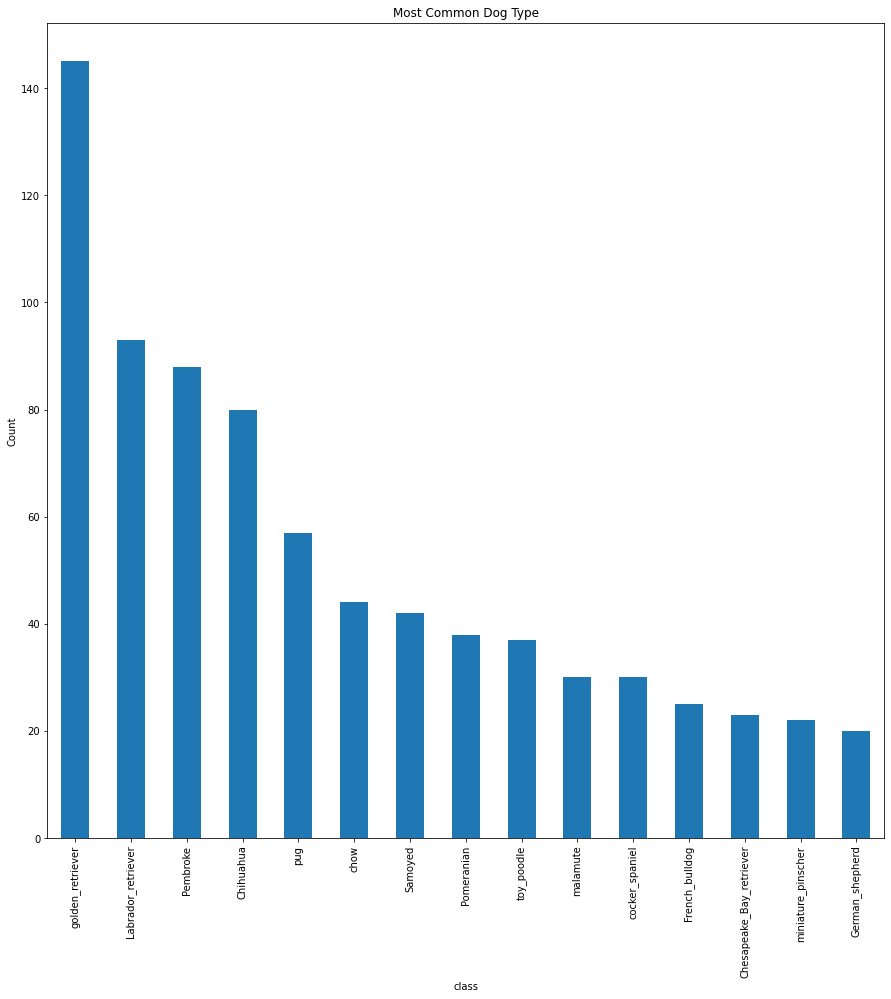

In [719]:
dog_type = master_df.groupby('class_prediction').filter(lambda x: len(x) >= 20)
dog_type['class_prediction'].value_counts().plot(kind = 'bar', figsize = (15, 15))
plt.title('Most Common Dog Type')
plt.xlabel('class')
plt.ylabel('Count')

In [720]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1492 non-null   int64  
 1   text                   1492 non-null   object 
 2   rating_numerator       1492 non-null   object 
 3   rating_denominator     1492 non-null   int64  
 4   Dates                  1492 non-null   object 
 5   dog_stage              1492 non-null   object 
 6   jpg_url                1492 non-null   object 
 7   img_num                1492 non-null   float64
 8   class_prediction       1492 non-null   object 
 9   prediction_confidence  1492 non-null   float64
 10  breed                  1492 non-null   bool   
 11  retweet_count          1492 non-null   float64
 12  favorite_count         1492 non-null   float64
 13  followers_count        1492 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage

In [721]:
master_df.rating_numerator.value_counts()

10      536
12      392
11      319
13      218
14       20
7         2
9         1
9.75      1
5         1
8         1
17        1
Name: rating_numerator, dtype: int64

Text(0.5, 1.0, 'Retweet Counts by Ratings Scatter Plot')

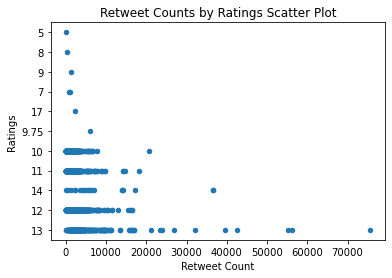

In [722]:
master_df.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Count')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

### Insight 2 <a class="anchor" id="chapter7"></a>

* Top Rated Dogs have less retweet count, and vice versa

In [723]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1492 non-null   int64  
 1   text                   1492 non-null   object 
 2   rating_numerator       1492 non-null   object 
 3   rating_denominator     1492 non-null   int64  
 4   Dates                  1492 non-null   object 
 5   dog_stage              1492 non-null   object 
 6   jpg_url                1492 non-null   object 
 7   img_num                1492 non-null   float64
 8   class_prediction       1492 non-null   object 
 9   prediction_confidence  1492 non-null   float64
 10  breed                  1492 non-null   bool   
 11  retweet_count          1492 non-null   float64
 12  favorite_count         1492 non-null   float64
 13  followers_count        1492 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage

In [757]:
# to know the average everything based on the dog type
df_dog_type_mean = master_df.groupby('class_prediction').mean()

### Insight 3 <a class="anchor" id="chapter8"></a>

* The top rated dog class is not the most common class.
* The most rated dog is Saluki, Tibetan_mastiff, briard, Border_terrier, standard_schnauzer, silky_terrier.

### Insight 4 <a class="anchor" id="chapter9"></a>

Dog ratings has no correlation with the most common dog